# Jenah Black
# Final Project, Data Science
# May 3, 2022

## Title [WIP]

## 2. Background

Speech is typically seamless and error-free. Nevertheless, robust patterns of speech errors have greatly informed our understanding of the hierarchical nature of the language processing system. However, the processes underlying the generation of segmental errors (changes below the lexical level, e.g., 'cat' -> 'sat') are not well understood. In particular, the relative contributions of discrete phoneme representations and distributed phonetic representations are debated. One way to examine which type of representation is active in the formation of sublexical errors is to observe the patterns of errors that result when working memory load is increased. In production, phonological working memory (PWM) is critical because sublexical units must be both activate and remembered in order to be produced in the correct order. PWM has been shown to abide by the assumptions of a resource model of working memory. Thus, as working memory load increases, the precision of each unit held in memory decreases.  Applied to language, this means that an increase in word length should lead to a decrease in the precision with which segments are encoded. Changes in precision can be measured by the deviation from
the target in the phonetic space. For example, the error /d/ is closer to /t/ in the phonetic space
than the error /m/ (because /d/ and /t/ only differ in on feature [voicing], while /d/ and /m/ differ in two features. 

Degradation of representations in memory will result in different patterns if the unit that is being held in memory is compositional (a collection of phonetic features, for example) versus non-compositional (a discrete phoneme that does not interface with phonetic features). Specifically, if the key unit is a collection of phonetic features, the surface representations of errors will exhibit continuous movement from the target as working memory load increases in the phonetic space away. However, if the key unit is a discrete phoneme, the error is occurring at a level removed from phonetic features. Therefore, as working memory load increases, there should be no coherent movement within the phonetic space. Understanding the underlying cause of segmental errors allows us to better conceptualize the structure of the language production system, as well as the influences that act upon that system at different stages in processing.

To investigate the underlying source of segmental errors, 4 individuals with aphasia and PWM deficitcs were administered a picture naming task, with target words of varying length (3 to 9 phonemes.) To measure the deviation (and thus precision) of the representations stored in phonological working memory, we used the ALINE distance between the aligned consonants (Kondrak, 2000). The ALINE distance is greater when the response phoneme and the target phoneme are farther apart in phonological space.


## 3. Variables

### Four native English-speaking individuals with post-stroke chronic aphasia (1 female, 3 male; ages 32 – 64) participated in the study.

### Each patient completed several rounds of a picture naming task, in which they had to identify and name a picture of an object. Variables collected from the picture naming task include:

- Target_IPA: the word the subject was trying to produce in the International Phonetic Alphabet (typically the identify of the picture)
    - string/factor
- Target phoneme: the phoneme the subject was trying to pronounce, typically part of the identity of the picture; e.g., /p/ in ‘apple’
    - string/factor
- Response phoneme: the phoneme that was actually pronounced
    - string/factor
- Distance: the distance between the target and response phonemes, described above
    - numeric
- Length: the number of phonemes in the target word
    - numeric
- Num_Errors: the total number of errors in the word
    - numeric
- Error: whether or not an error was produced on this phoneme
    - categorical (0 = correct, 1 = error)
- Frequency: the frequency of the target word in English
    - numeric
- Target_Position: the slot number of the target phoneme (e.g., the /p/ in 'ape' would have a position of 2)
    - numeric
- rel_nearest_end_position: the distance between the target phoneme and the nearest edge of the word, divided by the length of the word. This roughly corresponds to the position of the phoneme within the word, taking length into account. For example, the /p/ in 'ape' would have a relative position of .33 (distance of 1 from the nearest edge, divided by 3)
    - numeric
- Target_Place: the place of articulation of the target phoneme (e.g., alveolar)
    - string/factor
- Response_Place: the place of articulation of the response phoneme 
    - string/factor
- Target_Manner: the manner of articulation of the target phoneme (e.g., fricative)
    - string/factor
- Response_Manner: the manner of articulation for the response phoneme 
    - string/factor
- Target_Voice: whether or not the target phoneme is voiced
    - categorical (0 = voiceless, 1 = voiced)
- Response_Voice: whether or not the response phoneme is voiced
    - categorical (0 = voiceless, 1 = voiced)
    

### In total, there were 3,789 trials (each trial comprised one attempt of a subject attempting to name a picture). Further, there were 17,962 phoneme observations (since each sound in the word was coded separately). Of these phonemes, there were errors on 1,937 of them. 

## 4. Hypotheses

### 1. Distance in phonetic space between the target and the response phoneme will increase as the length of the word increases. 

This will be evaluated using linear mixed effects models for each subject individually as well as across subjects (as this study is a case series of patients, it is necessary to characterize each subject as well as the group). 

The form of the by-subject models will be: 

    Distance ~ Length + (1|Target_IPA)

The form of the across-subject model will be: 

    Distance ~ Length + (1|Target_IPA) + (1|Participant)
    
To ensure that the effect of length of ALINE distance was not altered by the phoneme’s position in the word, the analyses were repeated with a control variable, the relative position of a phoneme to the word boundaries. The motivation for including this variable comes from a large literature on positional effects in tasks that require serial recall from memory. In such tasks, items at the beginning and the end of a list are typically remembered better than items in the middle positions, creating a U-shaped distribution.

The form of the second-pass by-subjects models will be: 

    Distance ~ Length + Relative_Position + Length:Relative_Postiion + (1|Target_IPA)
    
The form of the second-pass aggregate model will be: 

    Distance ~ Length + Relative_Position + Length:Relative_Postiion + (1|Target_IPA) + (1|Participant)

If phonetic features are found to be the unit held in memory, we will next evaluate the form of these phonetic representations. There is debate about whether phonetic features are an abstract linguistic unit or if they are fundamentally motor representations. Individuals with known motor planning deficits (i.e., apraxia) provide us a way to examine this issue: in general, errors that result from motor planning impairments are directional. That is, the motor movements that result in errors are typically complex movements that are harder to produced (in linguistic jargon: these phonemes are 'marked') and they transform into easier forms (they become 'unmarked'). We know from previous work that individuals with apraxia that consonants are harder to produce than vowels, consonants produced further back in mouth (e.g., velar place of articulation, see figure below) are harder than those produced in the front (e.g., bilabial), and those produced with a looser constriction are harder than those produced with a thighter constriction. This leads us to a secondary hypthesis:

### 2. If phonetic features are encoded primarily as motor movements, it is expected that consonants should result in more errors than vowels, consonants produced in the back of the mouth will result in more errors than those in the front, and consonants produced with a looser constriction will result in more errors than those produced with a greater constriction.

To assess if consonants predict errors more than vowels, a logisitic model will be used:

    Error ~ CV
    
   where 'Error' is a binary term (0 = correct, 1 = error), and CV correspondings to the phonemes consonant/vowel status.

I also predict that consonants prototypically produced in the back of the mouth will also result in more errors. Additionally, consonants produced with a more open mouth (e.g., fricatives and affricates) will result in more errors.

This will also be in the form of a logistic model.

    Error ~ target_bilabial + target_velar + target_alveolar + target_dental + target_palatal + target_glottal + target_stop + target_fricative + target_affricate
    
![Places of Articulation (from A Course in Phonetics; Ladefoged & Johnson, 2001.](placesOfArticulation.png)

## 5. Data Organization

Provide descriptions of Data Architecture (e.g., how is the data organized), Data Cleansing & Tidying, and an example of the final of the Data Table(s) that will go into your analysis.

In [ ]:
library(ggplot2, quietly = TRUE)
library(ggpubr, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(tidyr, quietly = TRUE)
library(stats, quietly = TRUE)
library(openxlsx, quietly = TRUE)
library(lmerTest, quietly = TRUE)
library(broom, quietly = TRUE)
library(purrr, quietly = TRUE)
library(ISLR, quietly = TRUE)
library(boot, quietly = TRUE)

In [19]:
#### Load Data ####

# Load in processed data
alignments <- as.data.frame(read.xlsx("Processed_Data.xlsx", sheet="Pairs"))
head(alignments)

,participant,trial_id,item,picture,target,target_ipa,response_ipa,length,frequency,target_position,⋯,diff_voice,target_nasal,response_nasal,diff_nasal,target_lateral,response_lateral,diff_lateral,target_retroflex,response_retroflex,diff_retroflex
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,1,⋯,0,0,0,0,0,0,0,0,0,0
2,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,2,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,3,⋯,0,1,1,0,0,0,0,0,0,0
4,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,4,⋯,0,0,0,0,0,0,0,0,0,0
5,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,5,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,P3,1,1,hand,fingers,fɪŋɡəɹz,fɪŋɡəɹz,7,3.229682,6,⋯,0,0,0,0,0,0,0,0,0,0


Since there are only four subjects and the task was the same across all subjjects, the data are organized very simply: all responses of all four subjects are included in the same data set. 

Previously, the ALINE distances were calculated using the python implementation of ALINE, pyALINE (Huff, 2010). Within this process, any row that contained targets that could not be identified for transcriptions (e.g., the participant did not produce a real word) was removed. Additionally, any rows that were not the subject's first attempt at naming the picture were removed. Finally, any row that contained a target or response transcription that was not valid IPA was removed. Extraneous whitespace was stripped from the transcriptions. 

Additional data tidying is performed below:

- filtering the length of words such that each subject has sufficient data,
- selecting variables of interest from the larger data set
- Adding in computed variables, including:
    - binary variables for place and manner of articulation
- calculating a phoneme's relative position to the word boundaries
    - Position was calculated as the distance to the nearest boundary (i.e., number of phonemes to the start or end of the word, whichever is closest) divided by the total length of the word. For example, in /tɹʌmpət/, the /p/ phoneme is two positions away from the end of the word (versus four position from the start) and the word length is seven, so its relative to a boundary is .29. 
- log-transforming the distance measure to approximate normality
    - Production errors are influenced by the Phoneme Similarity Bias, which states that phonemes that share features are more likely to interact. As such, 'distance' is liekly to be non-normally distributed, as response and target phonemes are more likely to be more similar than more different. 

In [4]:
#### Functions ####

# Standard Error function for error bars
std_mean <- function(x) sd(x)/sqrt(length(x))

# Function to get relative position of phoneme in word (for plotting)
get_position <- function(pos, len) {
  if(pos == 1) {return('First')}
  else if(pos == 2) {return('First + 1')}
  else if(pos == len-1) {return('Last - 1')}
  else if(pos == len) {return('Last')}
  else {return('Middle')}
}

In [20]:
### Calculate the number of errors per word. Add as 'num_errors' column to alignments ###
alignments <- alignments %>%
  filter(!is.na(distance)) %>%
  group_by(trial_id) %>%
  mutate(num_errors = sum(distance > 0)) %>%
  ungroup()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



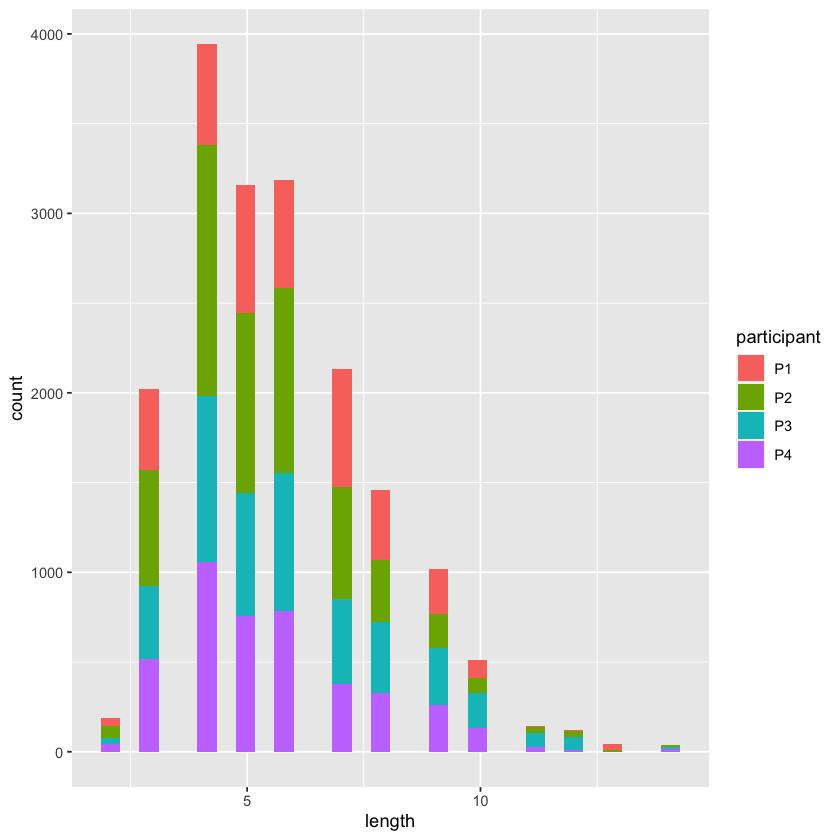

In [21]:
# Histogram of length of words. 
ggplot(data = alignments, aes(x = length, fill = participant)) +
  geom_histogram()

# My advisor and I determined that it would be appropriate to only use words up to 9 phonemes, 
# since that was the last length for which all subjects had responses

In [61]:
#### Construct Data Table for Modeling and Plots ####

# Remove words where the target is less than 3 phonemes or greater that 9 phonemes in length,
# Keep only relevant columns,
# Rename some variables for ease of use later on
model_data <- alignments %>%
  filter(length >= 3) %>%
  filter(length <= 9) %>%
  select(participant,
         trial_id,
         item,
         target = target_segment,
         target_ipa,
         target_segment,
         response_ipa,
         response_segment,
         length,
         frequency,
         cv,
         position = target_position,
         distance,
         target_voice,
         num_errors,
         diff_place , 
         diff_manner, 
         target_place,
         response_place,
         target_manner,
         response_manner) %>% 
    # Add in some additional useful variables:
    # error
    # The place of articulation of the target
    # The manner of articulation of the target.
  mutate(error = ifelse(distance == 0, 0, 1),
         target_bilabial = ifelse(target_place == 'bilabial', 1, 0),
         target_velar = ifelse(target_place == 'velar', 1, 0),
         target_alveolar = ifelse(target_place == 'alveolar', 1, 0),
         target_palatoAlveolar = ifelse(target_place == 'palato-alveolar', 1, 0),
         target_dental = ifelse(target_place == 'dental', 1, 0),
         target_palatal = ifelse(target_place == 'palatal', 1, 0),
         target_glottal = ifelse(target_place == 'glottal', 1, 0),
         target_stop = ifelse(target_manner == 'stop', 1, 0),
         target_fricative = ifelse(target_manner == 'fricative', 1, 0),
         target_approximate = ifelse(target_manner == 'approximate', 1, 0),
         target_affricate = ifelse(target_manner == 'affricate', 1, 0))

model_data$target <- as.factor(model_data$target)


In [63]:
#### Calculate Relative Position ####

# Determine distance from start and end positions
model_data$start_position <- model_data$position - 1
model_data$end_position <- model_data$length - model_data$position
model_data$nearest_end_position <- pmin(model_data$start_position, model_data$end_position)

# Divide the position by the length of the word to get the relative positions 
model_data$rel_start_position <- model_data$start_position / model_data$length
model_data$rel_end_position <- model_data$end_position / model_data$length
model_data$rel_nearest_end_position <- model_data$nearest_end_position / model_data$length

# get relative position (first, first -1, middle, last - 1, last) for each phoneme. This is used for plotting
model_data <- model_data %>% rowwise() %>% mutate(rel_position = get_position(position, length))

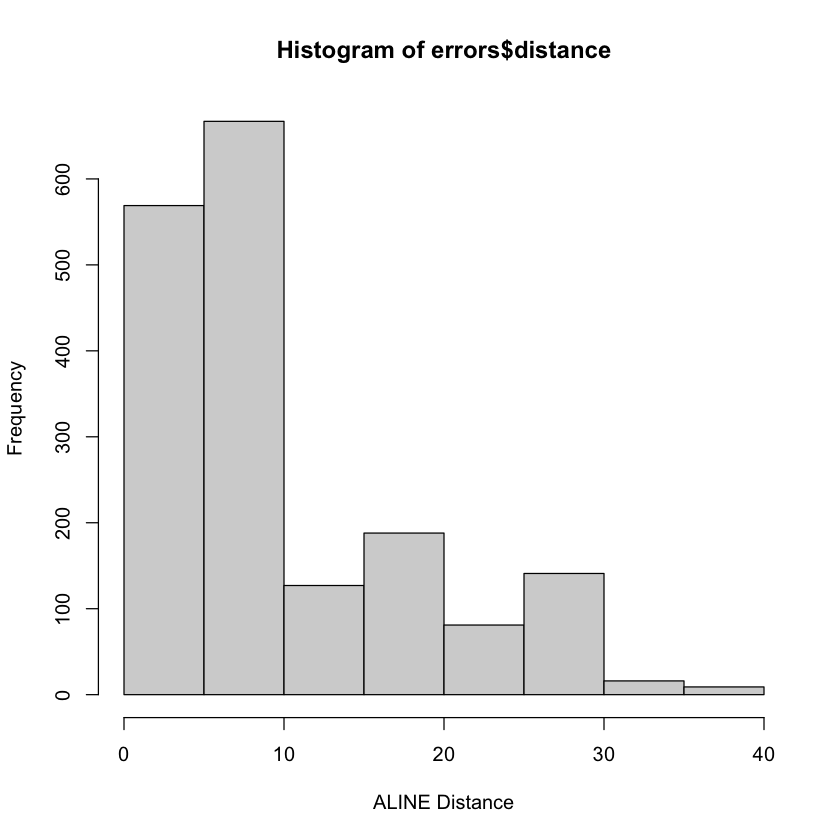

In [24]:
#### Check to see if distance is non-normally distributed #####

errors <- subset(model_data, distance != 0)
hist(errors$distance, xlab= 'ALINE Distance')

Yes, the distances are skewed. To approximate normality and match the assumptions of the following models, the distances can be log-transformed.

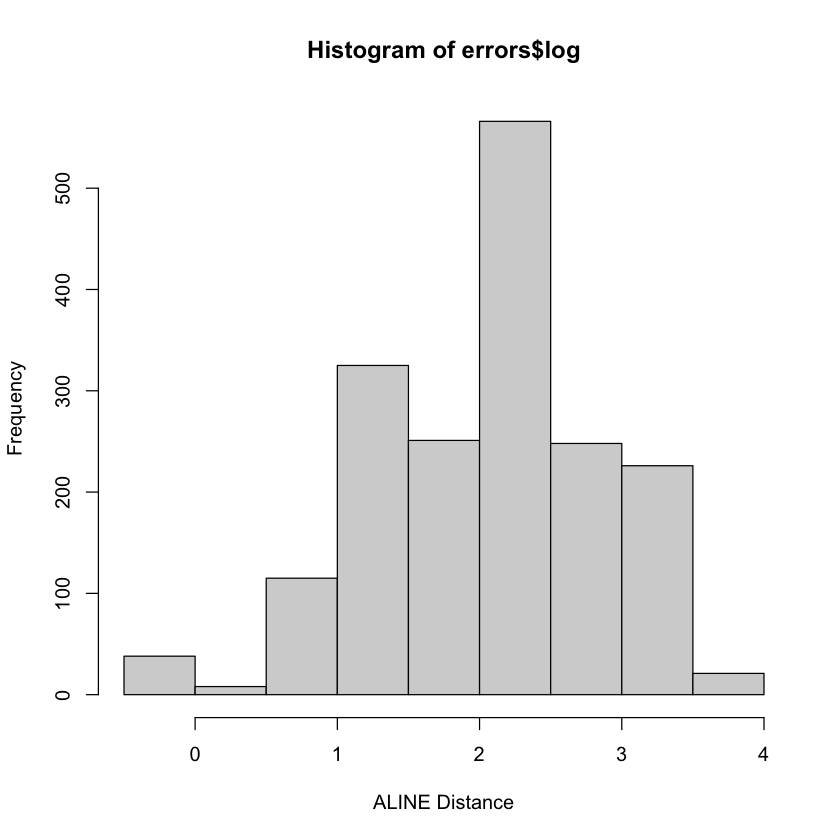

In [25]:
# As an example: 
errors$log <- log(errors$distance)
hist(errors$log, xlab= 'ALINE Distance')

# Do it for the actual data
model_data$log_distance <- log(model_data$distance +1) # adding 1 so the distances of 0 don't result in -Inf, but remain 0. 

### The final dataset to be used in the models is as follows:

In [64]:
head(model_data)

participant,trial_id,item,target,target_ipa,response_ipa,response_segment,length,frequency,cv,⋯,target_fricative,target_approximate,target_affricate,start_position,end_position,nearest_end_position,rel_start_position,rel_end_position,rel_nearest_end_position,rel_position
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
P3,1,1,f,fɪŋɡəɹz,fɪŋɡəɹz,f,7,3.229682,C,⋯,1,0,0,0,6,0,0.0000000,0.8571429,0.0000000,First
P3,1,1,ɪ,fɪŋɡəɹz,fɪŋɡəɹz,ɪ,7,3.229682,V,⋯,NA,NA,NA,1,5,1,0.1428571,0.7142857,0.1428571,First + 1
P3,1,1,ŋ,fɪŋɡəɹz,fɪŋɡəɹz,ŋ,7,3.229682,C,⋯,0,0,0,2,4,2,0.2857143,0.5714286,0.2857143,Middle
P3,1,1,ɡ,fɪŋɡəɹz,fɪŋɡəɹz,ɡ,7,3.229682,C,⋯,0,0,0,3,3,3,0.4285714,0.4285714,0.4285714,Middle
P3,1,1,ə,fɪŋɡəɹz,fɪŋɡəɹz,ə,7,3.229682,V,⋯,NA,NA,NA,4,2,2,0.5714286,0.2857143,0.2857143,Middle
P3,1,1,ɹ,fɪŋɡəɹz,fɪŋɡəɹz,ɹ,7,3.229682,C,⋯,0,0,0,5,1,1,0.7142857,0.1428571,0.1428571,Last - 1


# 6. Analyses



## 6a. Linear Mixed Effects Models

These models will query hypothesis 1: Distance in phonetic space between the target and the response phoneme will increase as the length of the word increases. Because these data were intended for use in a case series, it is appropriate to examine each individual first and then, if appropriate, examine the data in aggregate.
 


### Let's plot the relationship between length and distance in the phonetic space to see if there is an apparent relationship.

`summarise()` has grouped output by 'length'. You can override using the `.groups` argument.


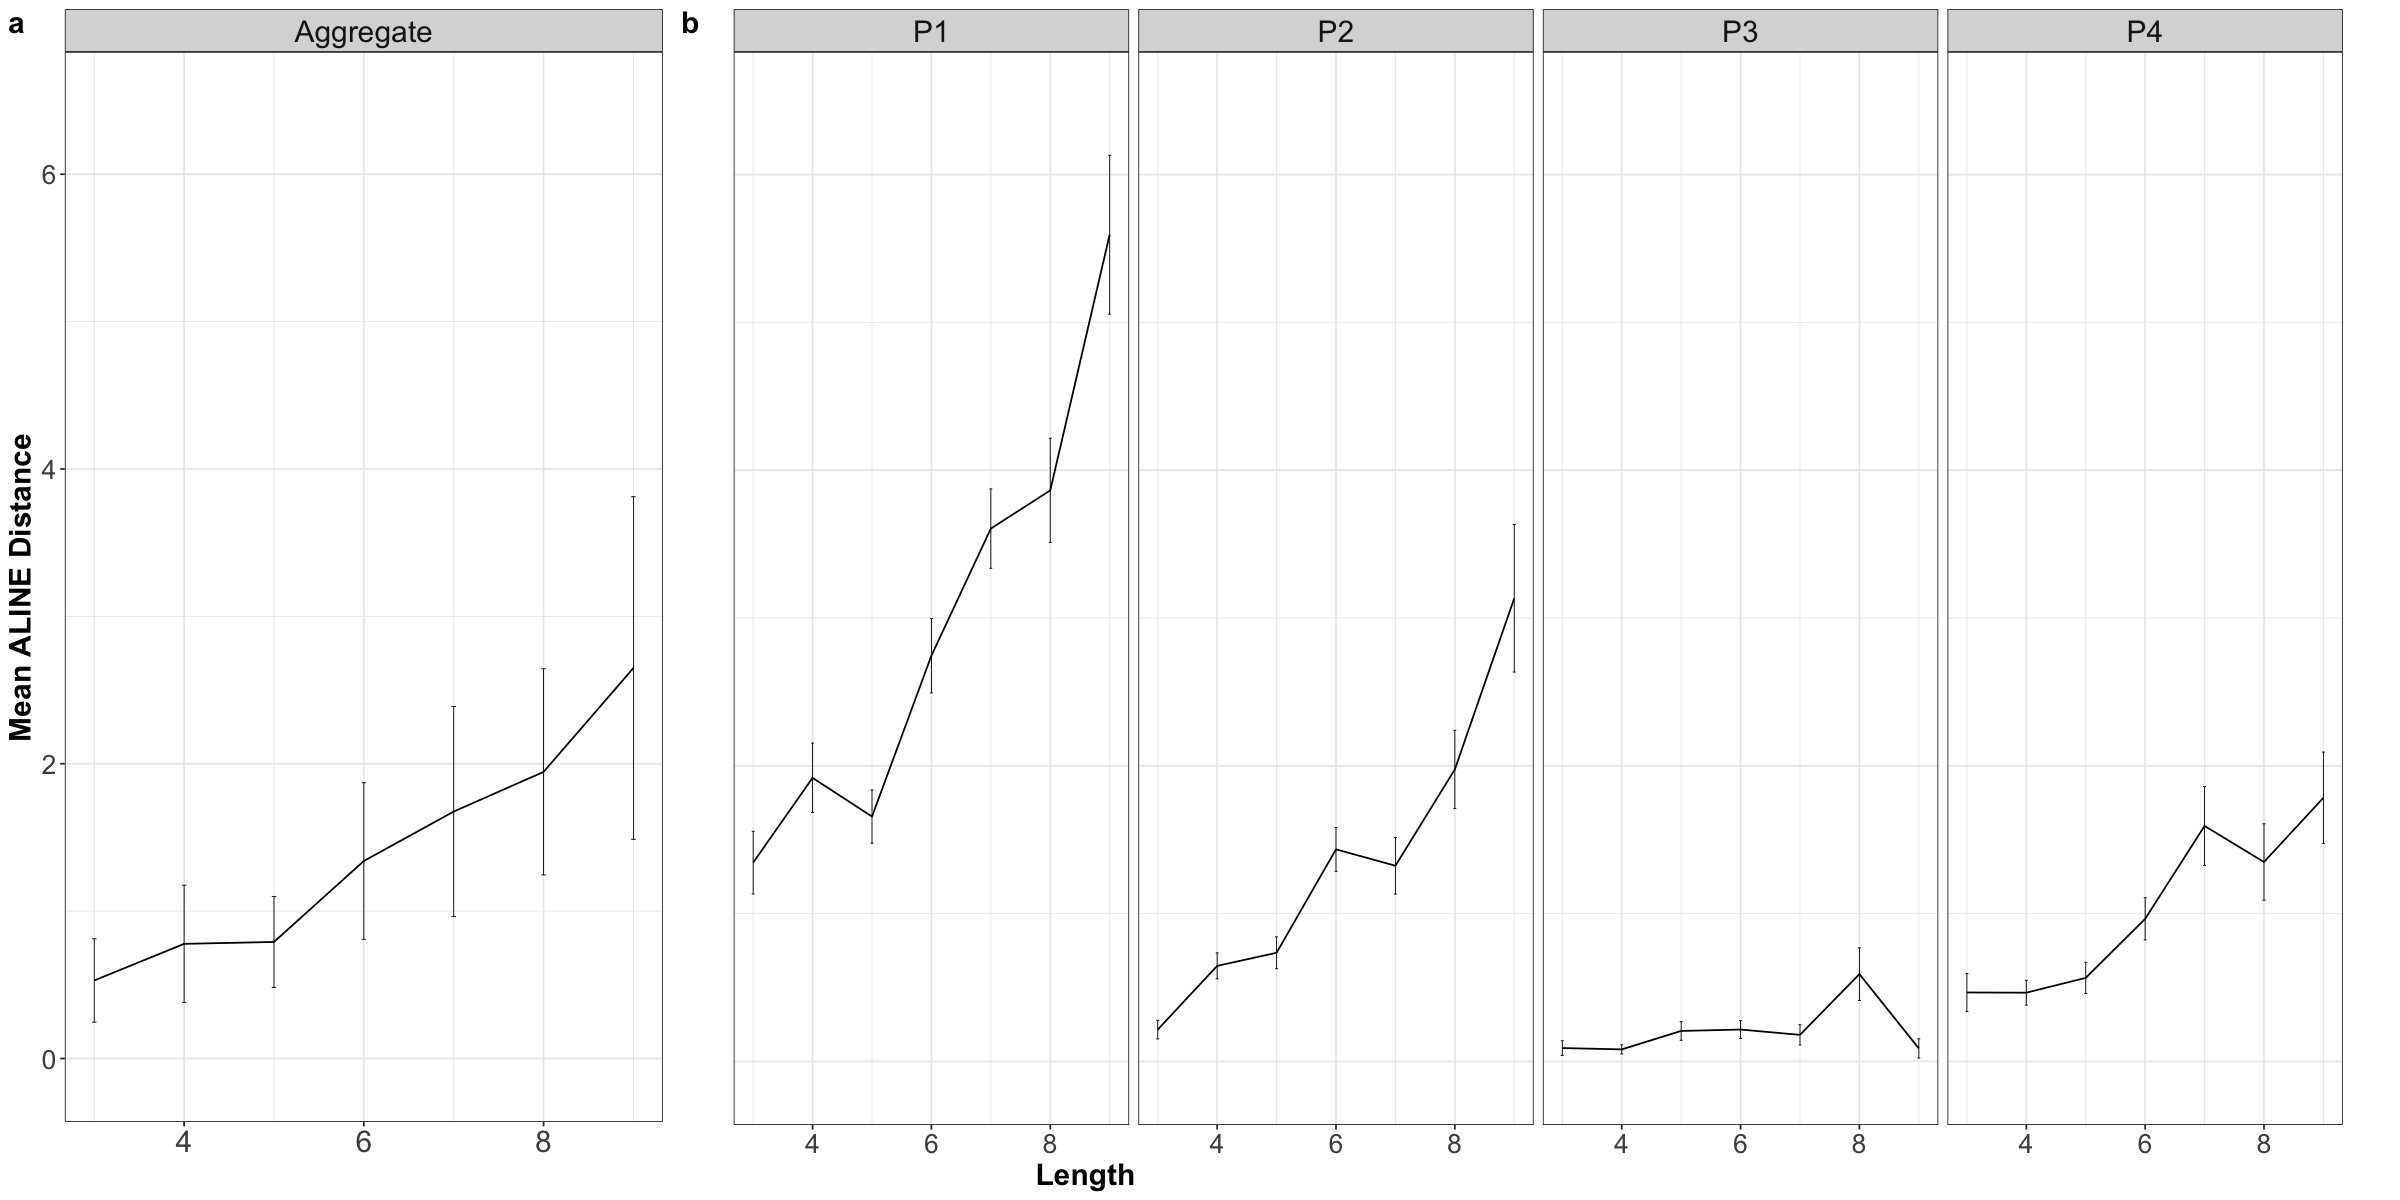

In [129]:

# Calculate subject means by length
by_participant_means_length <- model_data %>%
  group_by(length, participant) %>%
  summarize(by_participant_mean = mean(distance),
            standard_error = std_mean(distance),
            count = n_distinct(trial_id)) %>%
  mutate(meanLB = by_participant_mean - standard_error,
         meanUB = by_participant_mean + standard_error)

# Aggregate Plot Data
plot_data_length <- by_participant_means_length %>%
  group_by(length) %>%
  summarize(aggregate_mean = mean(by_participant_mean),
            standard_error = std_mean(by_participant_mean)) %>%
  mutate(meanLB = aggregate_mean - standard_error,
         meanUB = aggregate_mean + standard_error)
plot_data_length$Facet_Label <- "Aggregate"

# Aggregate Facet
length_effect_plot <- ggplot(plot_data_length, aes(x = length, y = aggregate_mean)) +
  facet_wrap(~Facet_Label) +
  geom_errorbar(aes(ymin = meanLB, ymax = meanUB),  width = 0.05, size = 0.25) +
  geom_line() +
  scale_x_continuous() +
  scale_y_continuous(limits = c(-0.1, 6.5)) +
  theme_bw() +
  labs(x = ' ', # place holder so the space for the tx-axis title remains (from subject facets)
       y = "Mean ALINE Distance",
       legend = 'Length') +
  theme(axis.title.y = element_text(size = 18, face = 'bold'), 
        axis.title.x = element_text(size = 18), 
        axis.text.x = element_text(size = 18),
        axis.text.y = element_text(size = 16),
        strip.text.x = element_text(size = 18))
#length_effect_plot

# Subject Facets
length_effect_plot_Subject <- ggplot(by_participant_means_length, aes(x = length, y = by_participant_mean)) +
  facet_grid(~participant) +
  geom_errorbar(aes(ymin = meanLB, ymax = meanUB), width = 0.05, size = 0.25) +
  geom_line() +
  scale_x_continuous() +
  scale_y_continuous(limits = c(-0.1, 6.5)) +
  theme_bw() +
  labs(x = 'Length',
       y = "Mean ALINE Distance") +
  theme(axis.title.y = element_blank(), 
        axis.title.x = element_text(size = 18, hjust = 0.2, face = 'bold'), 
        axis.text.x = element_text(size = 16),
        axis.text.y = element_blank(),
        axis.ticks.y = element_blank(),
        strip.text.x = element_text(size = 18))
#length_effect_plot_Subject

options(repr.plot.width=20, repr.plot.height=10)

# Combine aggregate and subject facets, position
combined_length <- ggdraw() + 
  draw_plot(length_effect_plot, x = 0, y = 0, width = .28, height = 1) +
  draw_plot(length_effect_plot_Subject, x = .30, y = 0, width = .68, height = 1) +
  draw_plot_label(label = c('a','b'), size = 18, x = c(0, .28))
combined_length

#### It looks like there is a relationship between length of word and the precision of the phonetic representations (i.e., the ALINE distance). It appears that as length increases, ALINE distance also increases. 

This relationship is less clear for Participant 3, so they may not show a statistically significant relationship.

This relationship can be examined statistically with linear mixed effects models. 

In [28]:
### Split data by subject for separate outputs


P1_data <- subset(model_data, participant == 'P1')
P2_data <- subset(model_data, participant == 'P2')
P3_data <- subset(model_data, participant == 'P3')
P4_data <- subset(model_data, participant == 'P4')


In [29]:
P1_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P1_data,
                    verbose = 0)
P1_length_1_summary <- summary(P1_length_1)
print(coef(P1_length_1_summary))

                 Estimate Std. Error       df    t value     Pr(>|t|)
(Intercept)   0.005734062 0.01945608 521.7969  0.2947182 7.683263e-01
scale(length) 0.212360062 0.01933080 540.0750 10.9855805 1.774429e-25


In [30]:
P2_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P2_data,
                    verbose = 0)
P2_length_1_summary <- summary(P2_length_1)
print(coef(P2_length_1_summary))

                Estimate Std. Error       df  t value     Pr(>|t|)
(Intercept)   0.02514282 0.02114706 410.2753 1.188951 2.351464e-01
scale(length) 0.19292041 0.02137009 407.4032 9.027590 7.049758e-18


In [31]:
P3_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P3_data,
                    verbose = 0)
P3_length_1_summary <- summary(P3_length_1)
print(coef(P3_length_1_summary))

                Estimate Std. Error       df  t value   Pr(>|t|)
(Intercept)   0.03842226 0.02653246 364.4561 1.448123 0.14844242
scale(length) 0.05260823 0.02673122 367.2198 1.968045 0.04981492


In [32]:
P4_length_1 <- lmer(scale(log_distance) ~ scale(length) + (1|target_ipa),
                    data = P4_data,
                    verbose = 0)
P4_length_1_summary <- summary(P4_length_1)
print(coef(P4_length_1_summary))

                Estimate Std. Error       df  t value     Pr(>|t|)
(Intercept)   0.05269306 0.02405073 433.7940 2.190913 2.898941e-02
scale(length) 0.16192072 0.02421743 433.1104 6.686123 7.083242e-11


All subjects showed a statistically signficant positive relationship between length and distance, even Participant 3 (though the p-value was just below 0.05.) 

#### Since all subjects show a similar pattern, we are justified in looking at the relationship between length and distance between-subjects.

In [34]:
aggregate_length_1 <- lmer(scale(log_distance) ~ scale(length) + 
                             (1|target_ipa) + (1|participant),
                           data = model_data,
                           verbose = 0)
aggregate_length_1_summary <- summary(aggregate_length_1)
aggregate_length_1_summary

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: scale(log_distance) ~ scale(length) + (1 | target_ipa) + (1 |  
    participant)
   Data: model_data

REML criterion at convergence: 46149.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0196 -0.4390 -0.1694 -0.0202  5.1350 

Random effects:
 Groups      Name        Variance Std.Dev.
 target_ipa  (Intercept) 0.08802  0.2967  
 participant (Intercept) 0.07237  0.2690  
 Residual                0.84528  0.9194  
Number of obs: 16915, groups:  target_ipa, 1306; participant, 4

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     0.03318    0.13503   3.01897   0.246    0.822    
scale(length)   0.17128    0.01173 976.53831  14.596   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
scal(lngth) -0.003

The aggregate model also shows this effect. 
#### However, increasing length of a word also changes the relative positions of the phonemes in the word. In other words, the interior phonemes are farther from the word edges in longer words than in shorter words. We know from classic literature (e.g., Atkinson & Shiffrin, 1971) that items at the beginning and end of a set are remembered better than items in the middle. 

We can visualize the data to see if this is generally the case:

`summarise()` has grouped output by 'rel_position'. You can override using the `.groups` argument.


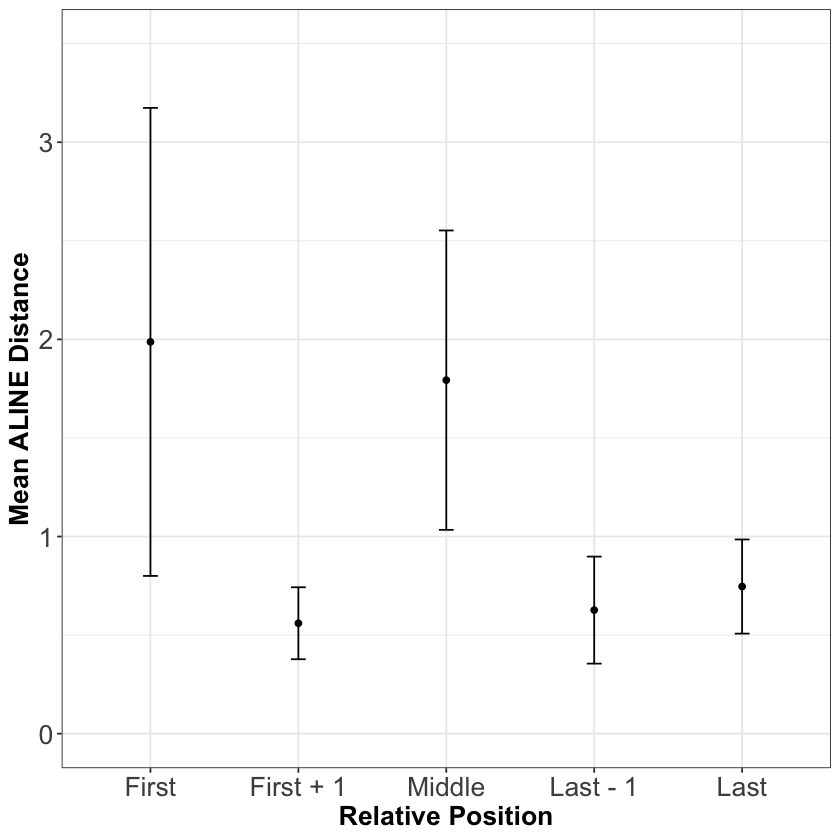

In [35]:
# Calculate the by- participant means
by_participant_means_position <- model_data %>%
  group_by(rel_position, participant) %>%
  summarize(by_participant_mean = mean(distance),
            standard_error = std_mean(distance),
            count = n_distinct(trial_id)) %>%
  mutate(meanLB = by_participant_mean - standard_error,
         meanUB = by_participant_mean + standard_error)

# Calculate means for the plot
plot_data_position <- by_participant_means_position %>%
  group_by(rel_position) %>%
  summarize(aggregate_mean = mean(by_participant_mean),
            standard_error = std_mean(by_participant_mean)) %>%
  mutate(meanLB = aggregate_mean - standard_error,
         meanUB = aggregate_mean + standard_error)

# Position plot
position_plot <- ggplot(plot_data_position, aes(x = rel_position, y = aggregate_mean)) +
  geom_point() +
  geom_errorbar(aes(ymin = meanLB, ymax = meanUB), width = 0.1) +
  scale_x_discrete(limits = c('First', 'First + 1', 'Middle', 'Last - 1', 'Last')) +
  scale_y_continuous(limits = c(0, 3.5)) +
  theme_bw() +
  labs(x = 'Relative Position',
       y = "Mean ALINE Distance") +
  theme(axis.title.y = element_text(size = 16, face = 'bold'), 
        axis.title.x = element_text(size = 16, face = 'bold'), 
        axis.text.x = element_text(size = 16),
        axis.text.y = element_text(size = 16),
        strip.text.x = element_text(size = 12))
position_plot

It does seem to the be the case that phonemes in the middle of the word have a greater ALINE distance than those on the edges (excluding the first position, which may be influenced by 'false starts', which are common in individuals with production deficits). 

#### Thus, it is important to see if the length effect persists even when relative position is included in the model. 

We'll do this first for each individual subject, and then the aggregate data. 

In [36]:
P1_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P1_data,
                    verbose = 0)
P1_length_2_summary <- summary(P1_length_2)
print(coef(P1_length_2_summary))

                                                 Estimate Std. Error        df
(Intercept)                                   -0.01074739 0.01957937  539.7924
scale(length)                                  0.22072230 0.01946752  560.1973
scale(rel_nearest_end_position)               -0.03425109 0.01592458 3204.3730
scale(length):scale(rel_nearest_end_position)  0.08963578 0.01549008 3325.5463
                                                 t value     Pr(>|t|)
(Intercept)                                   -0.5489139 5.832915e-01
scale(length)                                 11.3379785 5.736763e-27
scale(rel_nearest_end_position)               -2.1508317 3.156405e-02
scale(length):scale(rel_nearest_end_position)  5.7866574 7.845895e-09


In [38]:
P2_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P2_data,
                    verbose = 0)
P2_length_2_summary <- summary(P2_length_2)
print(coef(P2_length_2_summary))

                                                  Estimate Std. Error        df
(Intercept)                                    0.023921976 0.02125024  418.6716
scale(length)                                  0.199034019 0.02148278  416.6471
scale(rel_nearest_end_position)               -0.036678882 0.01310529 4846.8838
scale(length):scale(rel_nearest_end_position)  0.007050561 0.01272570 4945.6239
                                                 t value     Pr(>|t|)
(Intercept)                                    1.1257275 2.609258e-01
scale(length)                                  9.2648163 1.053679e-18
scale(rel_nearest_end_position)               -2.7987840 5.149819e-03
scale(length):scale(rel_nearest_end_position)  0.5540412 5.795757e-01


In [39]:
P3_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P3_data,
                    verbose = 0)
P3_length_2_summary <- summary(P3_length_2)
print(coef(P3_length_2_summary))

                                                 Estimate Std. Error        df
(Intercept)                                   0.036332027 0.02666762  371.9555
scale(length)                                 0.051331983 0.02687735  375.2575
scale(rel_nearest_end_position)               0.006988451 0.01476693 3411.7464
scale(length):scale(rel_nearest_end_position) 0.011094959 0.01442901 3478.4819
                                                t value   Pr(>|t|)
(Intercept)                                   1.3624025 0.17389528
scale(length)                                 1.9098605 0.05691332
scale(rel_nearest_end_position)               0.4732500 0.63606508
scale(length):scale(rel_nearest_end_position) 0.7689342 0.44198459


In [40]:
P4_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position)  + scale(length):scale(rel_nearest_end_position) + 
                      (1|target_ipa),
                    data = P4_data,
                    verbose = 0)
P4_length_2_summary <- summary(P4_length_2)
print(coef(P4_length_2_summary))

                                                  Estimate Std. Error        df
(Intercept)                                    0.054386143 0.02417401  443.0617
scale(length)                                  0.163796412 0.02435195  443.4552
scale(rel_nearest_end_position)               -0.009251078 0.01457793 3603.5282
scale(length):scale(rel_nearest_end_position) -0.009815371 0.01415398 3675.6020
                                                 t value     Pr(>|t|)
(Intercept)                                    2.2497776 2.495314e-02
scale(length)                                  6.7262139 5.385637e-11
scale(rel_nearest_end_position)               -0.6345948 5.257330e-01
scale(length):scale(rel_nearest_end_position) -0.6934708 4.880579e-01


#### Almost all subjects maintain a significant effect of length even when relative position is included in the model. 

Participant 3 did not maintain a significant effect, but the overall shape of the relationship was maintained. Additionally, relative position and the interaction between relative position and length appeared to have an effect in some participants, but not all. 

We can now examine these data at the aggregate level. 

In [41]:
aggregate_length_2 <- lmer(scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position) + scale(length):scale(rel_nearest_end_position) + 
                             (1|target_ipa) + (1|participant),
                           data = model_data,
                           verbose = 0)
aggregate_length_2_summary <- summary(aggregate_length_2)
aggregate_length_2_summary

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: 
scale(log_distance) ~ scale(length) + scale(rel_nearest_end_position) +  
    scale(length):scale(rel_nearest_end_position) + (1 | target_ipa) +  
    (1 | participant)
   Data: model_data

REML criterion at convergence: 46139.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.0224 -0.4360 -0.1712 -0.0131  5.1031 

Random effects:
 Groups      Name        Variance Std.Dev.
 target_ipa  (Intercept) 0.08793  0.2965  
 participant (Intercept) 0.07227  0.2688  
 Residual                0.84405  0.9187  
Number of obs: 16915, groups:  target_ipa, 1306; participant, 4

Fixed effects:
                                                Estimate Std. Error         df
(Intercept)                                    2.808e-02  1.349e-01  3.020e+00
scale(length)                                  1.746e-01  1.180e-02  1.001e+03
scale(rel_nearest_end_position)               -2.294e-02  7.198e-03

#### The positive, significant length effect was maintained when examined across-subjects. Additionally, relative position and the interaction between relative position and length also had a small signficant relationship, but relative position negatively influenced distance, such that as a phoneme's distance from the end points increased, its distance decreased (corresponding to an increased in precision of the representation.) 

This is the opposite effect than what we would expect from the primacy and recency literature, and is likely primarily driven by the frequency of errors on the first phoneme in the word. 

Earlier, we established that patterns of changes in precision can tell us something about the composition of the representation that is held in memory. These results suggest that the unit held in memory is composed of phonetic features, because we see that degrading precision results in continuous movement within the phonetic space. 

## 6b. Classifier

An additional question we might ask is if particular features of the target influece whether or not a participant is likely to make an error.  The following analyses will address hypothesis 2.

It has also been observed that more errors occur on consonants than on vowels. To determine if this is true for our data, we can visualize the differences between the error rates, taking into account the different frequencies of consonants and vowels in the dataset:

cv,Proportion_Correct,name,value
<chr>,<dbl>,<chr>,<dbl>
C,0.8821439,Error,1194
C,0.8821439,Correct,8937
V,0.9109670,Error,604
V,0.9109670,Correct,6180


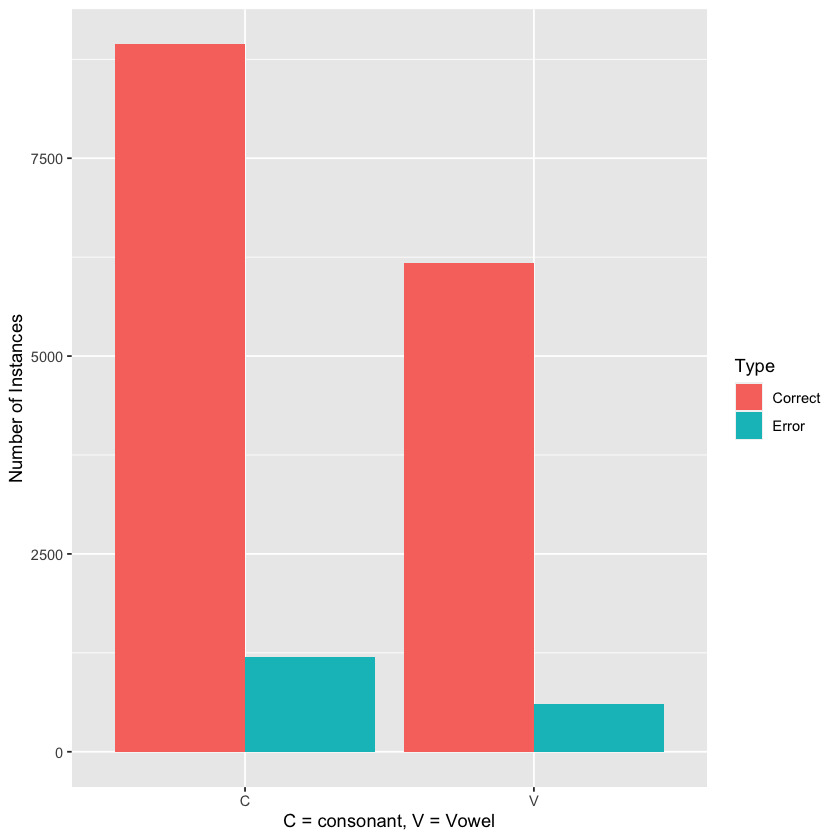

In [55]:
cv_summary <- model_data %>%
  group_by(cv) %>%
  summarize(Error = sum(error),
            Correct = sum(error==0),
            Proportion_Correct = Correct / (Error+Correct))
cv_summary_long <- pivot_longer(cv_summary, cols = c('Error','Correct'))
cv_summary_long

ggplot(data = cv_summary_long, aes(x = cv, y = value, fill = name)) +
  geom_bar(stat = 'identity', position = position_dodge(width = .9)) +
  labs(x = 'C = consonant, V = Vowel',
       y = 'Number of Instances',
       fill = 'Type')

For consonants, 88% of consonsants were produced correctly. For vowels, 91% of consonants were produced correctly. Therefore, it does seem like consonants result in more errors, in line with our predictions. 

To determine if CV status (consonant or vowel) has as statistical relationship relationship to errors, we can use a logisitic model:

In [57]:
log_model_cv = glm(error ~ cv, data = model_data, family = 'binomial')
summary(log_model_cv)


Call:
glm(formula = error ~ cv, family = "binomial", data = model_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5008  -0.5008  -0.5008  -0.4319   2.1994  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.01289    0.03081 -65.327  < 2e-16 ***
cvV         -0.31261    0.05260  -5.943  2.8e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 11458  on 16914  degrees of freedom
Residual deviance: 11422  on 16913  degrees of freedom
AIC: 11426

Number of Fisher Scoring iterations: 5


#### It does appear that there is a significant relationship between CV status and probability of error. Specifically, if a phoneme is a vowel, it is less likely to be an error. 

The data have followed our theoretical intuitions so far. We know from previous research involving people with motor planning deficits (in the context of speech) that people tend to simplify their articulations of consonants. This simplification typically results in a change in the place or manner of articulation-- that is, the place in the mouth where a constriction is made and the degree of constriction that is made. For example, a /p/ sound is produced by making a complete closure at the lips. 

#### We can examine the relationship of different places and manners of articulation using another logisitc model, but only using the data from the consonants:

In [65]:
# separate out consonant data
consonant_data <- subset(model_data, cv == 'C')
consonant_data <- na.omit(consonant_data)
head(consonant_data)

consonant_model = glm(error ~ target_bilabial +
                        target_dental +
                        target_alveolar + 
                        target_palatoAlveolar +
                        target_palatal +  
                        target_velar +
                        target_glottal +
                        target_stop +
                        target_fricative +
                        target_affricate,
                        family = 'binomial',
                        data = consonant_data)

summary(consonant_model)

participant,trial_id,item,target,target_ipa,response_ipa,response_segment,length,frequency,cv,⋯,target_fricative,target_approximate,target_affricate,start_position,end_position,nearest_end_position,rel_start_position,rel_end_position,rel_nearest_end_position,rel_position
<chr>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
P3,1,1,f,fɪŋɡəɹz,fɪŋɡəɹz,f,7,3.229682,C,⋯,1,0,0,0,6,0,0.0000000,0.8571429,0.0000000,First
P3,1,1,ŋ,fɪŋɡəɹz,fɪŋɡəɹz,ŋ,7,3.229682,C,⋯,0,0,0,2,4,2,0.2857143,0.5714286,0.2857143,Middle
P3,1,1,ɡ,fɪŋɡəɹz,fɪŋɡəɹz,ɡ,7,3.229682,C,⋯,0,0,0,3,3,3,0.4285714,0.4285714,0.4285714,Middle
P3,1,1,ɹ,fɪŋɡəɹz,fɪŋɡəɹz,ɹ,7,3.229682,C,⋯,0,0,0,5,1,1,0.7142857,0.1428571,0.1428571,Last - 1
P3,1,1,z,fɪŋɡəɹz,fɪŋɡəɹz,z,7,3.229682,C,⋯,1,0,0,6,0,0,0.8571429,0.0000000,0.0000000,Last
P3,2,2,k,kæt,kæt,k,3,3.529430,C,⋯,0,0,0,0,2,0,0.0000000,0.6666667,0.0000000,First



Call:
glm(formula = error ~ target_bilabial + target_dental + target_alveolar + 
    target_palatoAlveolar + target_palatal + target_velar + target_glottal + 
    target_stop + target_fricative + target_affricate, family = "binomial", 
    data = consonant_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6080  -0.5505  -0.4355  -0.3310   2.7273  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)            -3.0492     0.1851 -16.476  < 2e-16 ***
target_bilabial        -0.1093     0.1893  -0.578   0.5636    
target_dental           0.4241     0.3639   1.166   0.2438    
target_alveolar         0.1722     0.1595   1.080   0.2804    
target_palatoAlveolar   0.7594     0.1856   4.091 4.30e-05 ***
target_palatal          2.4030     0.3936   6.105 1.03e-09 ***
target_velar            0.4366     0.1885   2.317   0.0205 *  
target_glottal         -1.8842     0.6003  -3.139   0.0017 ** 
target_stop             0.8507     0.110

This model has interesting results. Some of the predictors are signficant, but not all. Critically, it appears the predictors are are not significant are particular places of articulation: bilabial, dental, and alveolar. These are all places of articulation at the front of the mouth. The place predictors that do have a significant positive relationship with error are all places in the back of the mouth: palato-alveolar, palatal, and velar. These results support findings from previous literature which show that people tend to move consonants further front in the mouth-- we would expect more errors on 'back' consonants as they move front, but 'front' consonants are already in a simpler form. 

The only place of articulation for which this doesn't hold is a glottal place of articulation. Glottal consonants are kind of a special case: we only have a couple in English (/h/ and the glottal stop), and they are produced in the larynx, rather than in the mouth. It may be the case that these sounds don't generally move around in the same way that sounds produced in the mouth do, and tend to stay in the same place.

All three of the manner of articulation predictors were significant. I am not entirely sure how to interpret these results in the context of the literature, as we hypothesized that stops would be produced with the greatest accuracy.  

# 6c. Permutation Testing & Bootstrapping

Some of our results intersect in an interesting way with previous literature. Therefore, it would be interesting to see the extent of these effects. 

Permutation testing allows us to quantify what kinds of patterns we would see in these data if no relationship between the predictors and the outcome truely existed. In this case, we are interested in examining the relationship between errors and place of articulation, since those were the predictors that were of theoretical interest. 

In [130]:
# Find coefficients in the unaltered dataset:

consonant_model_true = glm(error ~
                        target_stop +
                        target_fricative +
                        target_affricate +
                        target_bilabial +
                        target_dental +
                        target_alveolar + 
                        target_palatoAlveolar +
                        target_palatal +  
                        target_velar +
                        target_glottal,
                        family = 'binomial',
                        data = consonant_data)
true_coefficients <- coef(consonant_model_true)
true_coefficients

(Intercept)           target_stop      target_fricative 
           -3.0492105             0.8506555             1.2388087 
     target_affricate       target_bilabial         target_dental 
            3.2616535            -0.1093470             0.4241075 
      target_alveolar target_palatoAlveolar        target_palatal 
            0.1721760             0.7594176             2.4030423 
         target_velar        target_glottal 
            0.4365727            -1.8841585

In [101]:
###### Permutations ######

permuted <- consonant_data #to be permuted in the for loop

n_observations = dim(permuted)[1]

r_permutations = 1000 # number of permutations

# 7 predictors + intercept, thus 8 columns to capture the effects
# filling with nas at first.
permuted_coefficients = matrix(NA,nrow = r_permutations , ncol=10) 

for(i in 1:r_permutations) {
    # shuffle around predictors without replacement
  permuted$target_bilabial <- permuted$target_bilabial[sample(n_observations)]
  permuted$target_dental <- permuted$target_dental[sample(n_observations)]
  permuted$target_alveolar <- permuted$target_alveolar[sample(n_observations)]
  permuted$target_palatoAlveolar <- permuted$target_palatoAlveolar[sample(n_observations)]
  permuted$target_palatal <- permuted$target_palatal[sample(n_observations)]
  permuted$target_velar <- permuted$target_velar[sample(n_observations)]
  permuted$target_glottal <- permuted$target_glottal[sample(n_observations)]
  permuted$target_stop <- permuted$target_stop[sample(n_observations)]
  permuted$target_fricative <- permuted$target_fricative[sample(n_observations)]
  permuted$target_affricate <- permuted$target_affricate[sample(n_observations)]

  
  # run the model of the permuted data
  consonant_model = glm(error ~ 
                        target_stop +
                        target_fricative +
                        target_affricate +
                        target_bilabial +
                        target_dental +
                        target_alveolar + 
                        target_palatoAlveolar +
                        target_palatal +  
                        target_velar +
                        target_glottal,
                          family = 'binomial',
                          data = permuted)
  
  permuted_coefficients[i,] <- coef(consonant_model)[-1] 
  
}
permuted_coefficients <- as.data.frame(permuted_coefficients)

colnames(permuted_coefficients) <- c(attr(consonant_model$terms,"term.labels"))

head(permuted_coefficients)


,target_stop,target_fricative,target_affricate,target_bilabial,target_dental,target_alveolar,target_palatoAlveolar,target_palatal,target_velar,target_glottal
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.06546550,0.05996862,0.5963641,0.039812136,0.84015858,0.02403043,-0.01030789,-0.05239952,-0.03024556,-0.29614372
2,-0.02390787,-0.06337752,0.5002104,0.017439927,-0.05300385,-0.11020436,-0.15012147,-0.36417270,-0.15819516,-0.30626846
3,0.00904979,-0.11488704,-0.7244276,-0.056572569,-0.25988050,0.12842905,-0.08500935,0.22921661,0.02451745,-0.02136539
4,-0.01788000,-0.15650179,0.1710450,-0.068803056,0.40041090,-0.01059231,0.14516583,0.60475288,0.08299145,-0.12776049
5,0.01092258,0.04317097,-0.4264025,0.042963526,0.11701974,-0.03435613,0.02161481,0.22681206,-0.07482926,-0.20333586
6,0.04762576,-0.04896858,0.2059496,0.004902372,-0.84361510,0.04770870,0.24800330,0.79790866,0.06197666,0.71931550


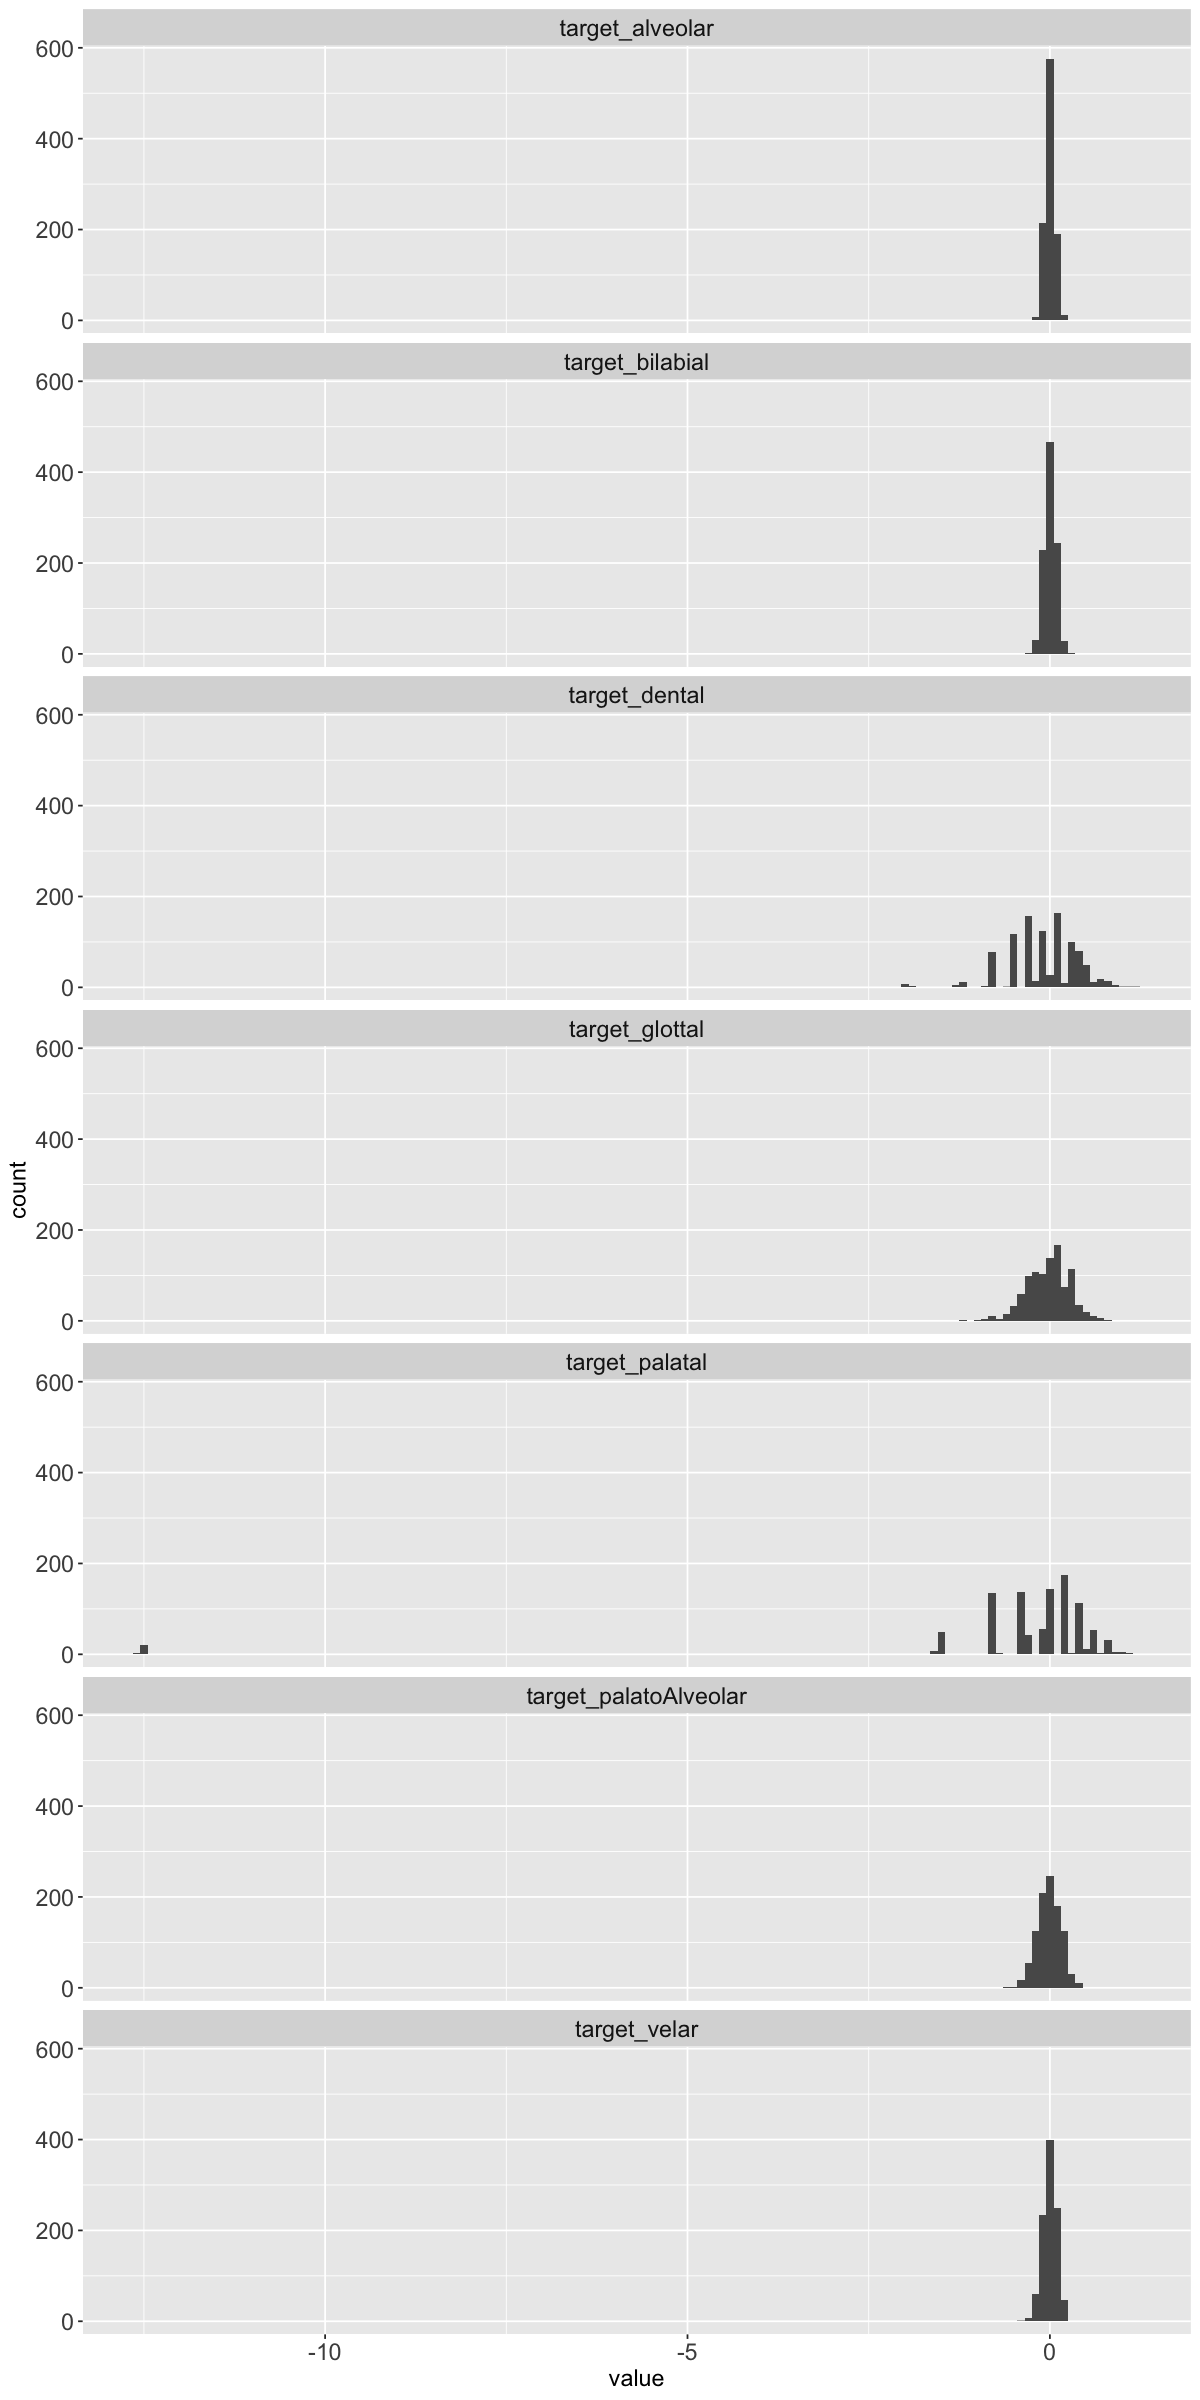

In [103]:
options(repr.plot.width=10, repr.plot.height=20)

permuted_coefficients <- permuted_coefficients %>% dplyr::select(target_bilabial,
                                                          target_dental,
                                                          target_alveolar,
                                                          target_palatoAlveolar,
                                                          target_palatal,
                                                          target_velar,
                                                          target_glottal)

permuted_coefficients_long <-pivot_longer(permuted_coefficients, cols = colnames(permuted_coefficients))

ggplot(data = permuted_coefficients_long, aes(x = value)) +
  geom_histogram(binwidth = 0.1) +
  facet_wrap(permuted_coefficients_long$name ~., ncol = 1) +
  theme(axis.text.x = element_text(size = 14),
        axis.title.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        strip.text = element_text(size = 14)
        )


#### We can now empirically test to see how our true effects compare with the permuted effects. More precisely, what is the probability that we would observe a stronger effect in the permuted models than the true model (which would support the null hypothesis)?

In [119]:
# remind ourselves of the true coefficients:
true_coefficients

# bilabial: stronger = more negative
bilabial_prob <- (sum(permuted_coefficients$target_bilabial<true_coefficients['target_bilabial'])/r_permutations)*100
print(paste('probablity for bilabial effect:', bilabial_prob))

# dental: stronger = more positive
dental_prob <- (sum(permuted_coefficients$target_dental>true_coefficients['target_dental'])/r_permutations)*100
print(paste('probablity for dental effect:', dental_prob))

# alveolar: stronger = more positive
alveolar_prob <- (sum(permuted_coefficients$target_alveolar>true_coefficients['target_alveolar'])/r_permutations)*100
print(paste('probablity for alveolar effect:', alveolar_prob))

# palato-alveolar: stronger = more positive
p_alveolar_prob <- (sum(permuted_coefficients$target_palatoAlveolar>true_coefficients['target_palatoAlveolar'])/r_permutations)*100
print(paste('probablity for palato-alveolar effect:', p_alveolar_prob))

# palatal: stronger = more positive
palatal_prob <- (sum(permuted_coefficients$target_palatal>true_coefficients['target_palatal'])/r_permutations)*100
print(paste('probablity for palatal effect:', palatal_prob))

# velar: stronger = more positive
velar_prob <- (sum(permuted_coefficients$target_velar>true_coefficients['target_velar'])/r_permutations)*100
print(paste('probablity for velar effect:', velar_prob))

# glottal: stronger = more negative
glottal_prob <- (sum(permuted_coefficients$target_glottal<true_coefficients['target_glottal'])/r_permutations)*100
print(paste('probablity for glottal effect:', glottal_prob))

(Intercept)           target_stop      target_fricative 
           -3.0492105             0.8506555             1.2388087 
      target_bilabial         target_dental       target_alveolar 
           -0.1093470             0.4241075             0.1721760 
target_palatoAlveolar        target_palatal          target_velar 
            0.7594176             2.4030423             0.4365727 
       target_glottal 
           -1.8841585

[1] "probablity for bilabial effect: 8.8"
[1] "probablity for dental effect: 11.2"
[1] "probablity for alveolar effect: 0.3"
[1] "probablity for palato-alveolar effect: 0"
[1] "probablity for palatal effect: 0"
[1] "probablity for velar effect: 0"
[1] "probablity for glottal effect: 0"


For the three front-most places of articulation, there was some overlap between the coefficients of the permuted models and the true coefficients, suggesting that any effect does not reflect any true underlying relationship. However, for the palato-alveolar, palatal, and velar effects, there was no overlap between the permuted models and the true coefficients. Therefore, we can surmise that there is a relationship between 'back' places of articulation on the production of speech errors. 

We can test the uncertainty of our predictions by using bootstrapping to determine the range of coefficient values when the data set is sampled with replacement. This way we can see if the values we computed in the true model are an accurate reflection of the trends in the data. 1000 iterations of the function were performed.

In [121]:
# A function to perform the model fitting on the indexed data
bootstrap_fn <- function(data, index) {
  bootstrap_model <- glm(error ~  target_stop +
                                   target_fricative +
                                   target_affricate +
                                   target_bilabial +
                                   target_dental +
                                   target_alveolar + 
                                   target_palatoAlveolar +
                                   target_palatal +  
                                   target_velar +
                                   target_glottal,
                                   family = 'binomial',
                                   subset = index,
                                   data = consonant_data)
  
  
  return(coef(bootstrap_model)[-1])
}

bootstrapped_coefficients <- boot(consonant_data, bootstrap_fn, R=1000)
bootstrapped_coefficients_t <- as.data.frame(bootstrapped_coefficients$t)
colnames(bootstrapped_coefficients_t) <- c(attr(consonant_model$terms,"term.labels"))

head(bootstrapped_coefficients_t)

0.9834945,1.1909620,3.257388,-2.934346e-01,0.286461816,0.03348532,0.8349954,2.308007,0.169911977,-0.5658059
0.4870511,0.9905774,2.792620,-1.877370e-01,-0.410071289,0.01789075,0.6856382,2.053862,0.336125012,-14.8966982
0.8552062,1.2877906,3.367232,-2.671054e-01,0.269919616,0.12220288,0.6753847,2.875012,0.309970967,-3.2035984
1.0593721,1.2889386,3.674660,-5.146244e-01,-0.156799688,-0.02759290,0.7862053,1.932917,0.002542242,-2.3443750
1.0087549,1.2686485,3.795060,-4.485072e-01,-0.054801346,-0.02577376,0.5025305,2.253893,0.341257980,-2.4653909
0.8100712,1.0351585,2.982479,-3.583914e-01,0.367724780,-0.11458418,0.9277839,2.162056,0.050309017,-1.8593114
0.8563147,1.2022027,3.439086,-2.735600e-01,0.007555352,0.08011249,0.6385708,2.222982,0.076183737,-2.0734875
0.8041700,1.1755412,3.214985,1.656952e-01,0.343602862,0.44843189,1.1540391,2.905054,0.617772647,-1.7282341
0.8135884,1.4518786,3.981502,3.043294e-01,0.743955509,0.42504852,0.8170217,2.924428,0.779166318,-0.4772021
0.8856221,1.3421063,3.656126,-3.587511e-01,0.399847116,0.04320251,0.7565221,2.837886,0.370846268,-1.3351446
0.8943229,1.3774234,3.441704,-2.773874e-01,0.111675661,-0.01089054,0.3612494,2.034620,0.180355532,-1.5431100


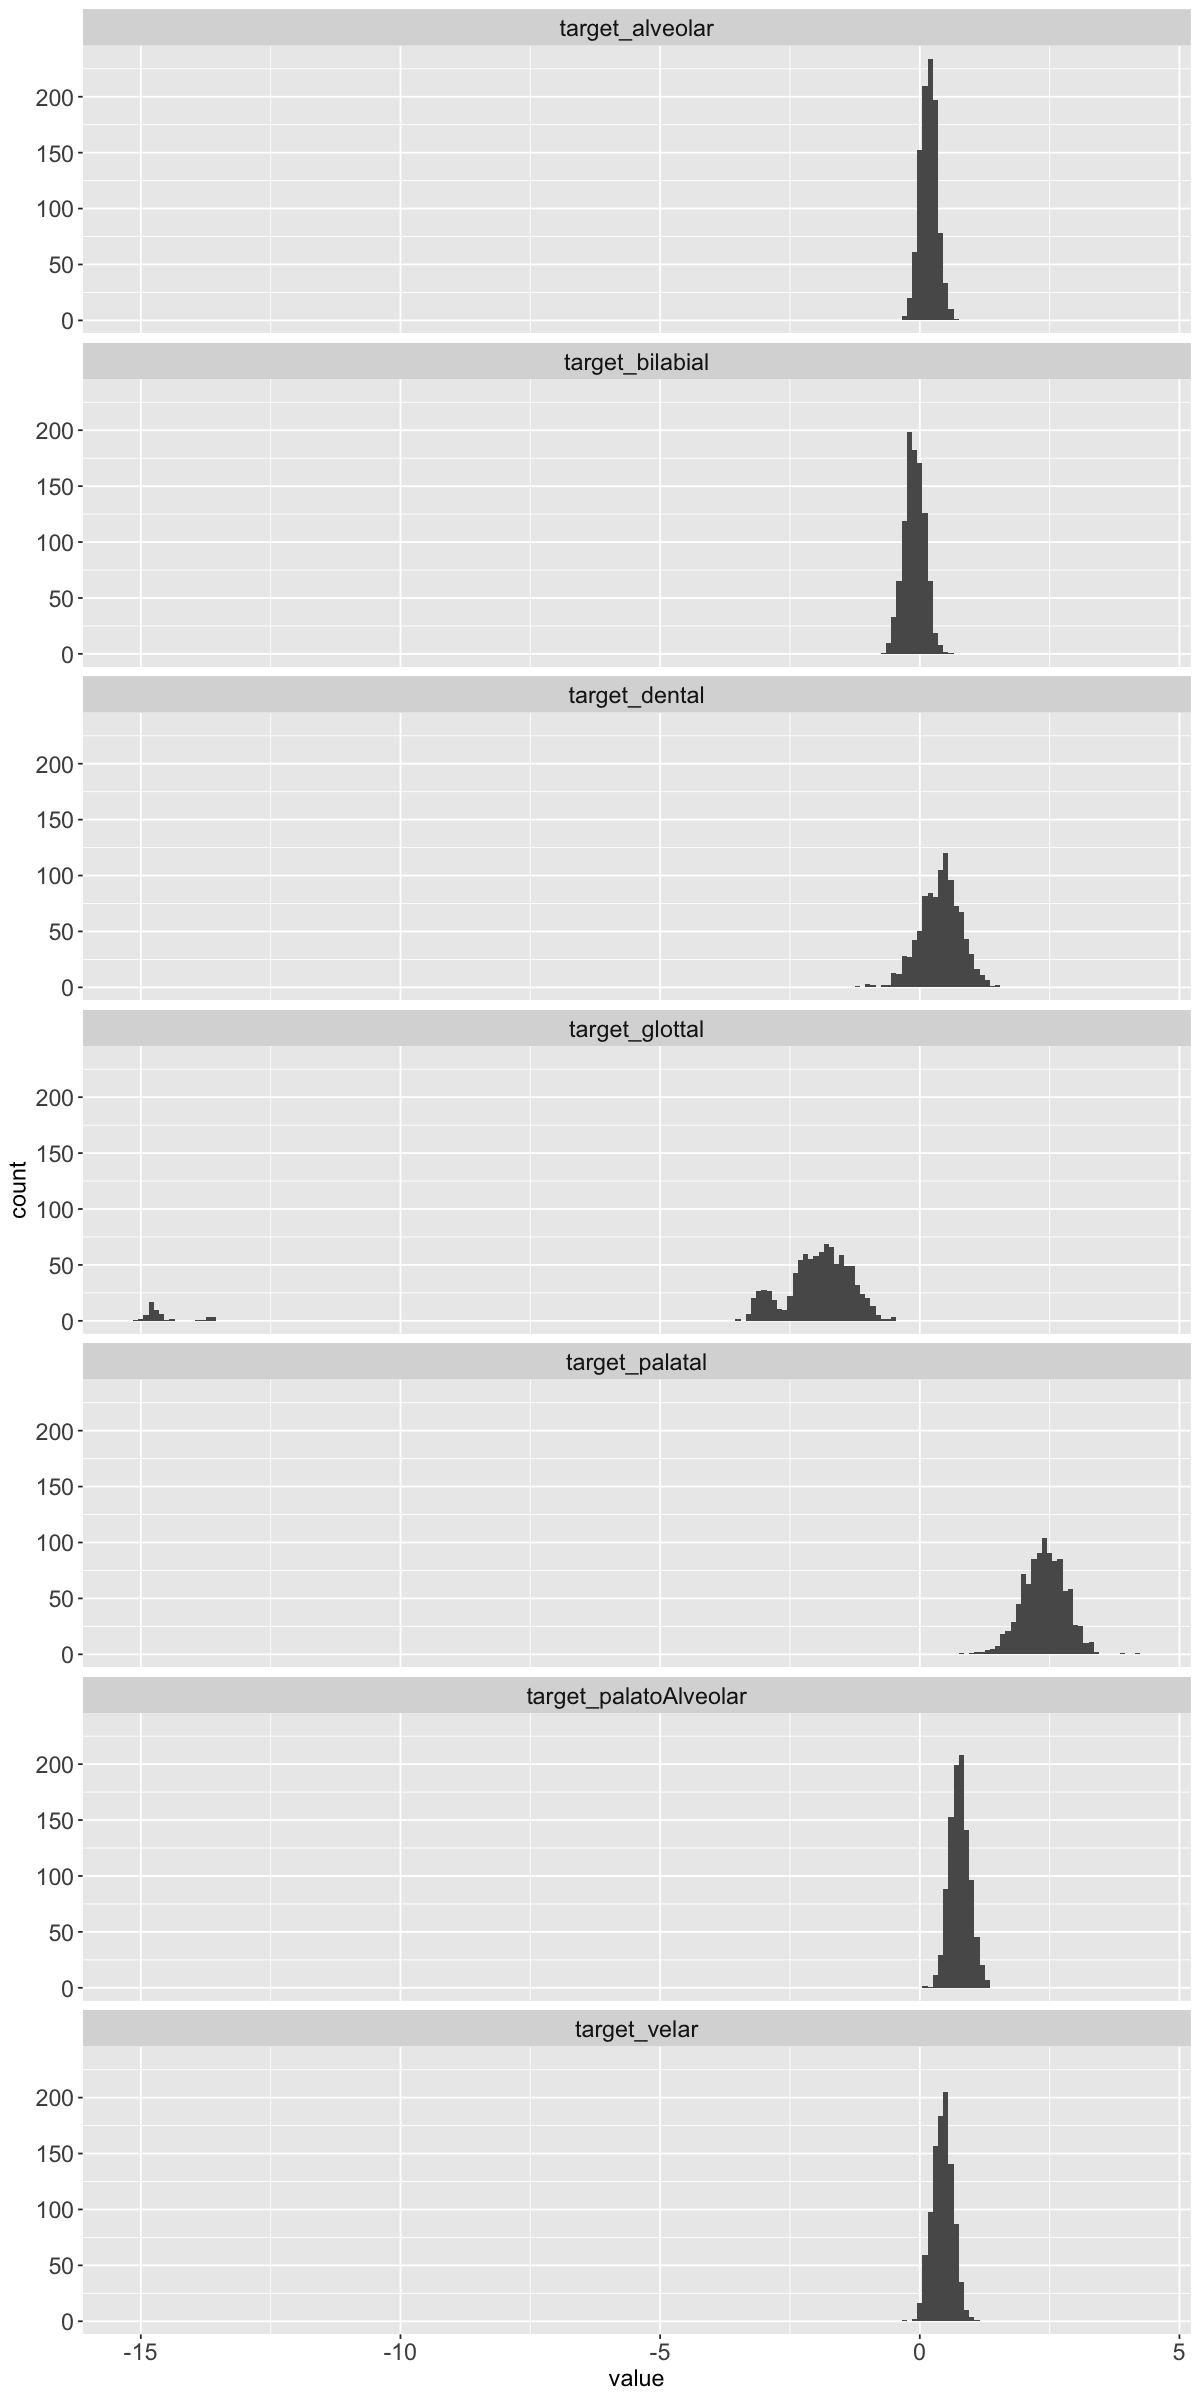

In [125]:
bootstrapped_coefficients_t <- bootstrapped_coefficients_t %>% dplyr::select(target_bilabial,
                                                          target_dental,
                                                          target_alveolar,
                                                          target_palatoAlveolar,
                                                          target_palatal,
                                                          target_velar,
                                                          target_glottal)


bootstrapped_coefficients_long <-pivot_longer(bootstrapped_coefficients_t, cols = colnames(bootstrapped_coefficients_t))

ggplot(data = bootstrapped_coefficients_long, aes(x = value)) +
  geom_histogram(binwidth = 0.1) +
  facet_wrap(bootstrapped_coefficients_long$name ~., ncol = 1) +
  theme(axis.text.x = element_text(size = 14),
        axis.title.x = element_text(size = 14),
        axis.text.y = element_text(size = 14),
        axis.title.y = element_text(size = 14),
        strip.text = element_text(size = 14)
  )


In [127]:
bootstrapped_coefficients_summary <- bootstrapped_coefficients_long %>%
  group_by(name) %>%
  summarize(mean_coefficient = mean(value),
            standard_error = std_mean(value)) %>%
  mutate(upper_bound = mean_coefficient + standard_error,
         lower_bound = mean_coefficient - standard_error,
         true_coefficient = true_coefficients[name],
         # determine whether the effect from the true model is within the standard error bounds of the bootstrap
         within_bounds = true_coefficient > lower_bound & true_coefficient < upper_bound) %>%
  rename(Effect = name)
bootstrapped_coefficients_summary

Effect,mean_coefficient,standard_error,upper_bound,lower_bound,true_coefficient,within_bounds
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
target_alveolar,0.1705900,0.005132896,0.1757229,0.1654571,0.1721760,TRUE
target_bilabial,-0.1062746,0.006224833,-0.1000498,-0.1124994,-0.1093470,TRUE
target_dental,0.3878422,0.012430368,0.4002725,0.3754118,0.4241075,FALSE
target_glottal,-2.6110483,0.090609590,-2.5204387,-2.7016579,-1.8841585,FALSE
target_palatal,2.3924704,0.013055079,2.4055255,2.3794153,2.4030423,TRUE
target_palatoAlveolar,0.7625121,0.006057080,0.7685692,0.7564550,0.7594176,TRUE
target_velar,0.4361806,0.006121411,0.4423020,0.4300592,0.4365727,TRUE


Overall, it appears that our original estimates of the coefficients fall within the bounds estimated by the bootstrapped models, except for the dental and glottal places of articulation. 

## Finally, it might be interesting to see if the classifier model accurately predicts whether or not a subject will make an error.

## 7. Conclusions

A short (1 paragraph) conclusion with respect to the models you have run